<a href="https://colab.research.google.com/github/kshitij3006/Object-Detection-YOLOv8/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics pandas matplotlib seaborn pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [2]:
from ultralytics import YOLO
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from google.colab import files
import os


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]


Saving jonas-kakaroto-5JQH9Iqnm9o-unsplash.jpg to jonas-kakaroto-5JQH9Iqnm9o-unsplash.jpg


In [4]:
model = YOLO("yolov8n.pt")  # Can use yolov8s.pt for more accuracy


100%|██████████| 6.25M/6.25M [00:00<00:00, 54.9MB/s]


In [5]:
results = model(image_path)
results[0].save(filename="output.jpg")



image 1/1 /content/jonas-kakaroto-5JQH9Iqnm9o-unsplash.jpg: 448x640 3 apples, 2 oranges, 333.9ms
Speed: 13.7ms preprocess, 333.9ms inference, 29.6ms postprocess per image at shape (1, 3, 448, 640)


'output.jpg'

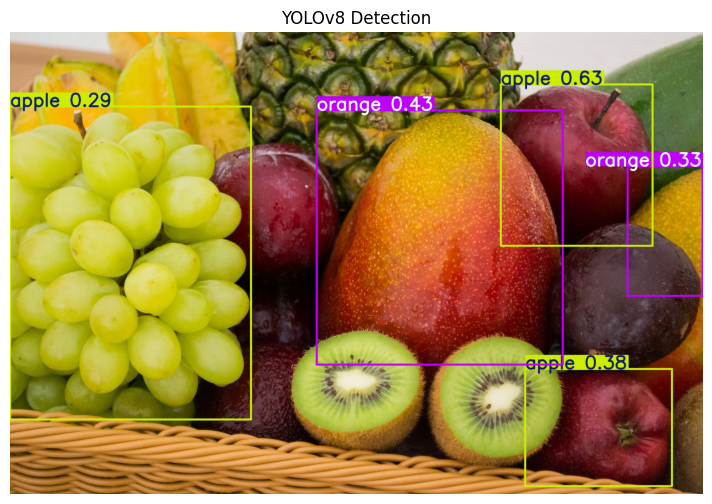

In [6]:
img = Image.open("output.jpg")
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis("off")
plt.title("YOLOv8 Detection")
plt.show()

In [7]:
boxes = results[0].boxes
classes = boxes.cls.tolist()
scores = boxes.conf.tolist()
names = results[0].names

data = {
    "Object": [names[int(cls)] for cls in classes],
    "Confidence": [round(score, 2) for score in scores]
}
df = pd.DataFrame(data)
df.to_csv("detection_report.csv", index=False)
df.head()


,Object,Confidence
0,apple,0.63
1,orange,0.43
2,apple,0.38
3,orange,0.33
4,apple,0.29


/tmp/ipython-input-8-1494293263.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Object", data=df, palette="pastel")


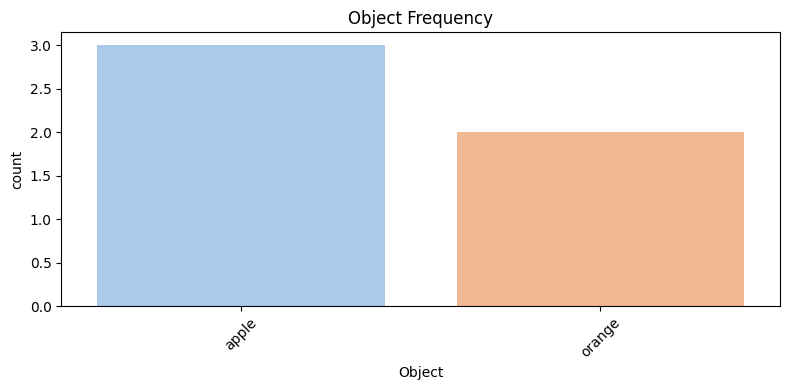

In [8]:
plt.figure(figsize=(8,4))
sns.countplot(x="Object", data=df, palette="pastel")
plt.title("Object Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("class_counts.png")
plt.show()


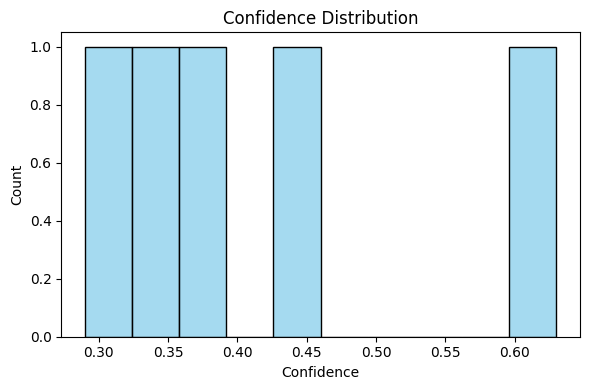

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df["Confidence"], bins=10, color="skyblue", edgecolor="black")
plt.title("Confidence Distribution")
plt.xlabel("Confidence")
plt.tight_layout()
plt.savefig("confidence_hist.png")
plt.show()


In [10]:
files.download("output.jpg")
files.download("detection_report.csv")
files.download("class_counts.png")
files.download("confidence_hist.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
!mkdir object_detection_project
!mv output.jpg detection_report.csv class_counts.png confidence_hist.png object_detection_project/
